In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('../../fusion'))
sys.path.append(module_path)

In [2]:
from preprocessing_datasets import load_dataset
from embedding_algorithms import sentence_embedding, set_embedding_model
from dimensionality_reduction_algorithms import dimension_reduction_algorithms
from cluster_algorithms import cluster_algorithm

from helper import load_by_index, get_author_candidate
from plot_tools import plotChart, plotCluster

In [3]:
key_values = {
    'model_type':'bilstm',
    'char_level':False,
    'model_version': 2,
    'rnn_dim':1024,
    'verbose':1,
    'attributes_list': ['authors','title','big_cate', 'small_cate'],
    'embedding_type': 'inferSent',
    'dataset': 'merged_book',
    'cluster_method': 'tsne',
    'dimension_reduction': 'pca',
    'num_components': 2,
    'cluster_method': 'hierarchy',
    'num_clusters': 10
}

# SETUP INFERSENT

In [4]:
set_embedding_model(key_values)

Vocab size : 2196017
model_version: 2
rnn_dim: 1024
model_type: bilstm
char_level: False
Setup time is: 174.47130513191223


# LOAD

In [5]:
dataset_name, table_group_by_isbn, isbn_list, true_authors = load_dataset(key_values)

dataset: merged_book
Loading time is: 21.915996074676514


# Analysis book-1

In [6]:
table_ISBN, list_authors, true_author = load_by_index(table_group_by_isbn, isbn_list, true_authors, 0)

ISBN: 0439136350
true author: J. K. Rowling


In [7]:
table_ISBN['authors'].value_counts()

J.K. Rowling                                                               38
Rowling, J. K.                                                             38
Rowling, J.K.                                                              30
J. K. Rowling                                                              10
None                                                                        6
J.K. Rowling; Mary GrandPr? [Illustrator]                                   6
J.K. Rowling, Mary GrandPr                                                  4
Rowling, J K                                                                3
J K Rowling                                                                 3
J.K. ROWLING, MARY GRANDPR                                                  1
J.K. ROWLING                                                                1
ROWLING,J                                                                   1
ROWLING, J. K.: 3rd NOVEL of the HARRY POTTER Septet            

In [8]:
embeddings_tokens = sentence_embedding(table_ISBN, key_values)

embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 1.4195878505706787


dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.051683664321899414
rows: 167
classes: 167


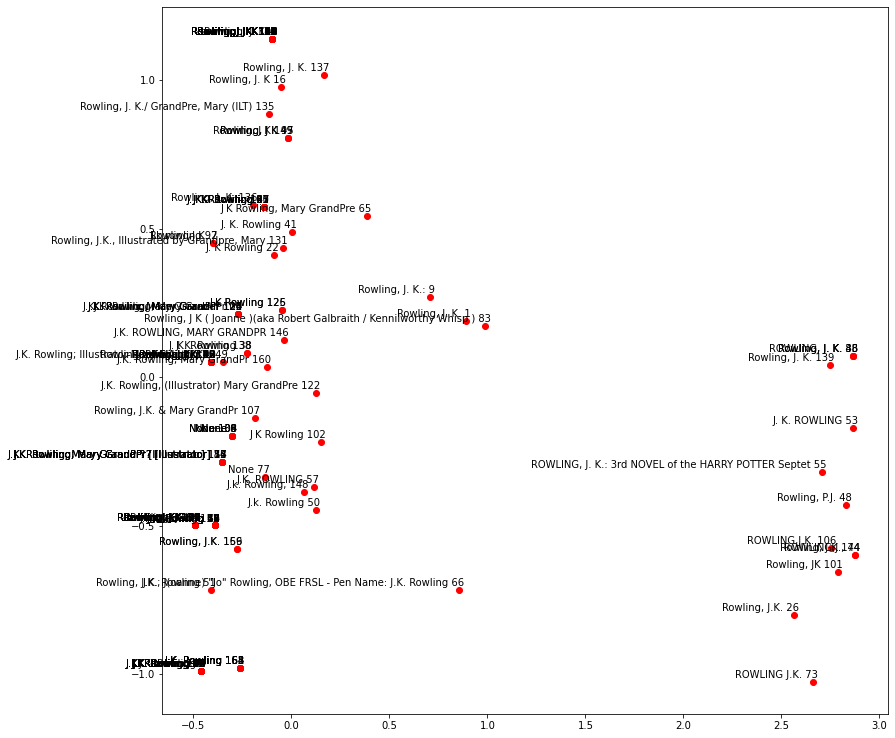

In [9]:
pca_embeddings = dimension_reduction_algorithms(embeddings_tokens, key_values)
plotChart(list_authors, pca_embeddings)

cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0050201416015625
num of classes: 10


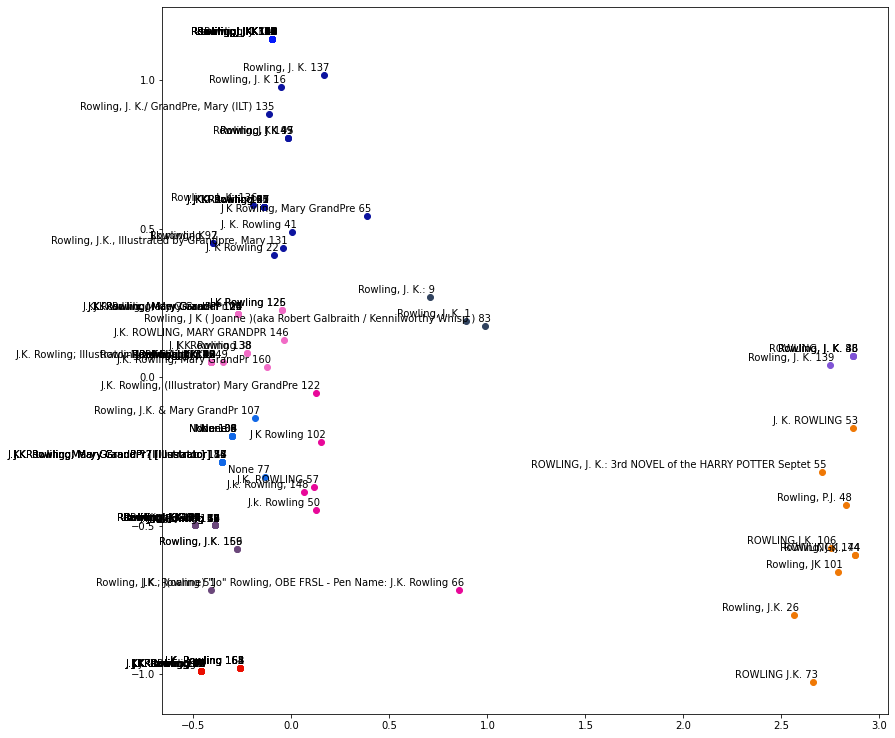

In [11]:
blocks = cluster_algorithm(pca_embeddings, key_values)
plotCluster(blocks, list_authors, key_values['num_clusters'], pca_embeddings)

In [12]:
author_candidate = get_author_candidate(list_authors, blocks)
print("{0} VS true_author: {1}".format(author_candidate, true_author))

{'Rowling, J. K.': 32} VS true_author: J. K. Rowling


# Loop

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 2<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0439784549
true author: J. K. Rowling
-------------------------------
tot cases of author's name: 23
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.8275268077850342
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.007725715637207031
rows: 156
classes: 156


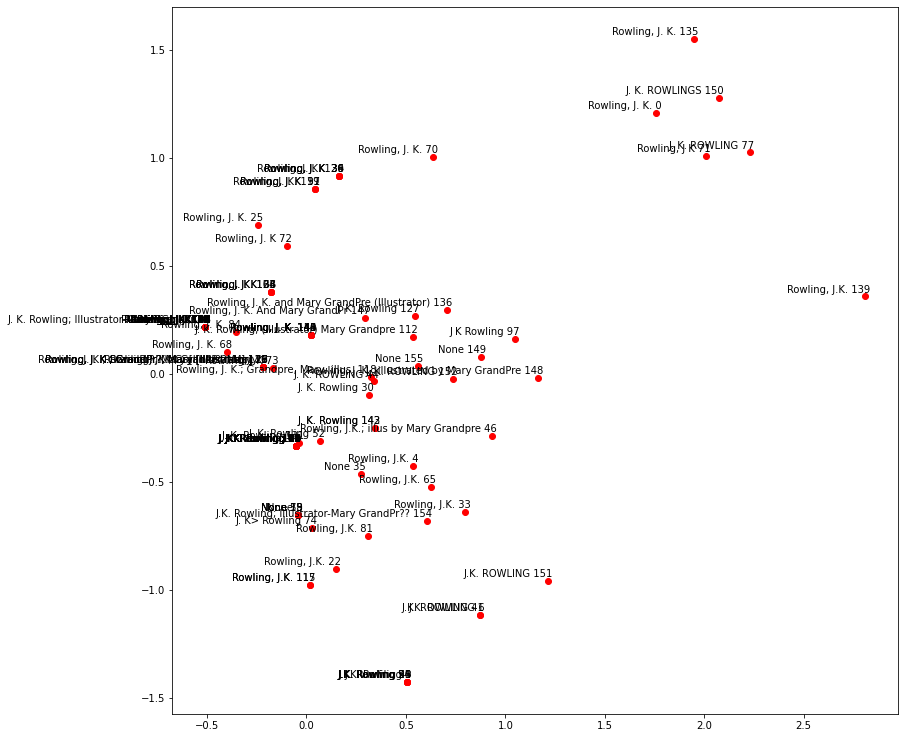

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0026559829711914062
num of classes: 10


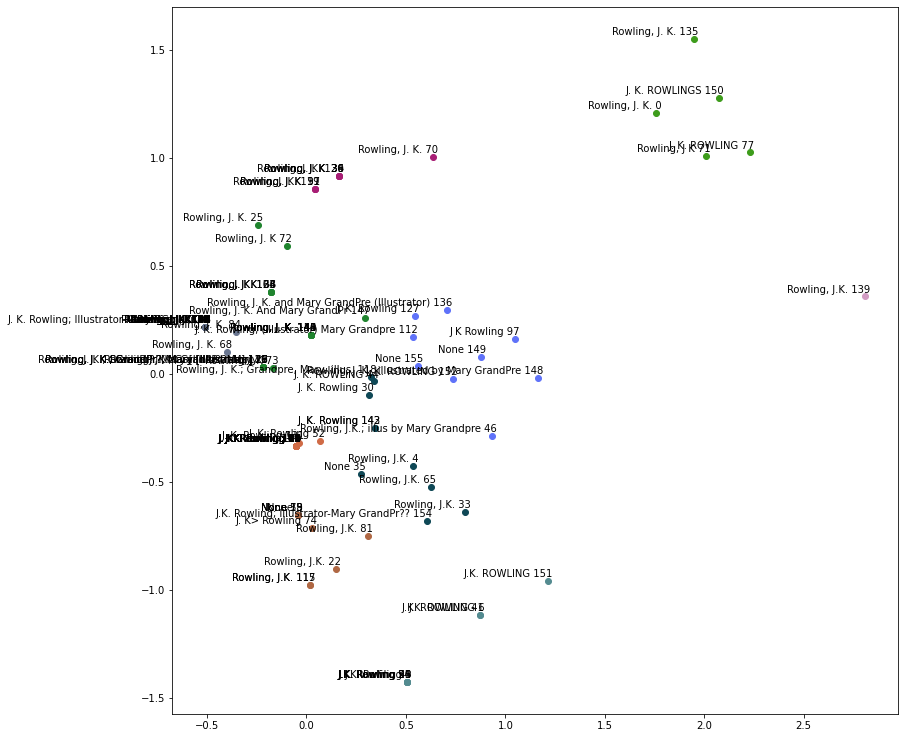

-------------------------------
{'J. K. Rowling; Illustrator-Mary GrandPr': 1, 'ROWLING, J. K.': 1, 'Rowling, J. K.': 54} VS true_author: J. K. Rowling
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 3<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0385349947
true author: Sheryl Sandberg
-------------------------------
tot cases of author's name: 18
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.8997700214385986
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.019366979598999023
rows: 149
classes: 149


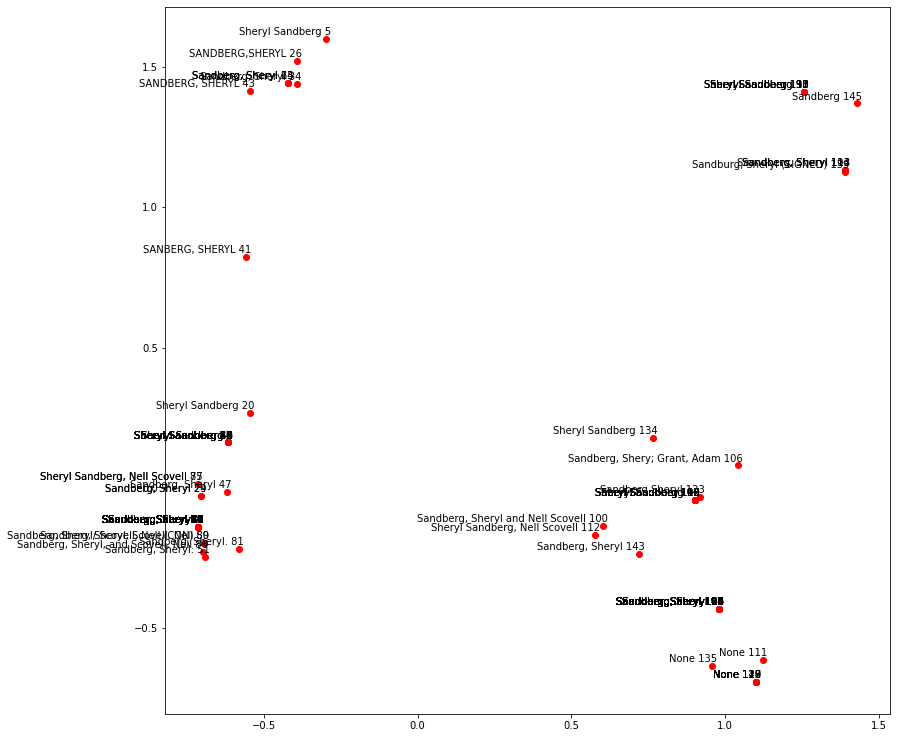

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0018429756164550781
num of classes: 10


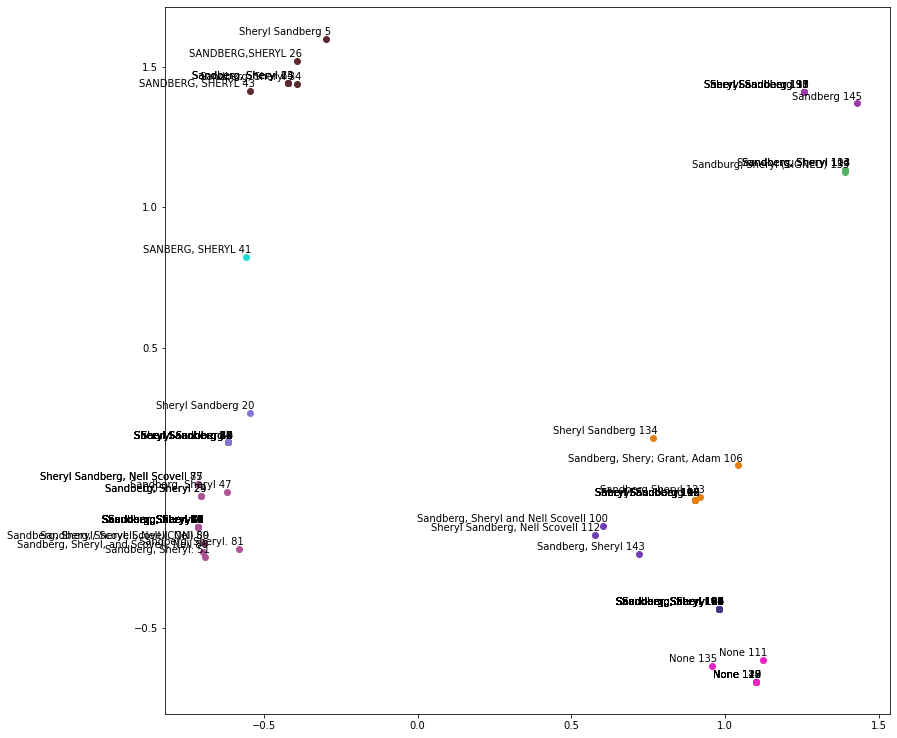

-------------------------------
{'Sandberg, Sheryl': 60, 'Sandberg, Sheryl, and Scovell, Nell': 1, 'Sandberg, Sheryl.': 1, 'Sandberg, Sheryl/ Scovell, Nell (CON)': 1, 'Sandberg, Sheryl:': 1, 'Sandberg, Sheryl; Scovell, Nell': 1, 'Sheryl Sandberg, Nell Scovell': 2} VS true_author: Sheryl Sandberg
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 4<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0787960756
true author: Patrick Lencioni
-------------------------------
tot cases of author's name: 12
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.7511131763458252
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.009001970291137695
rows: 149
classes: 149


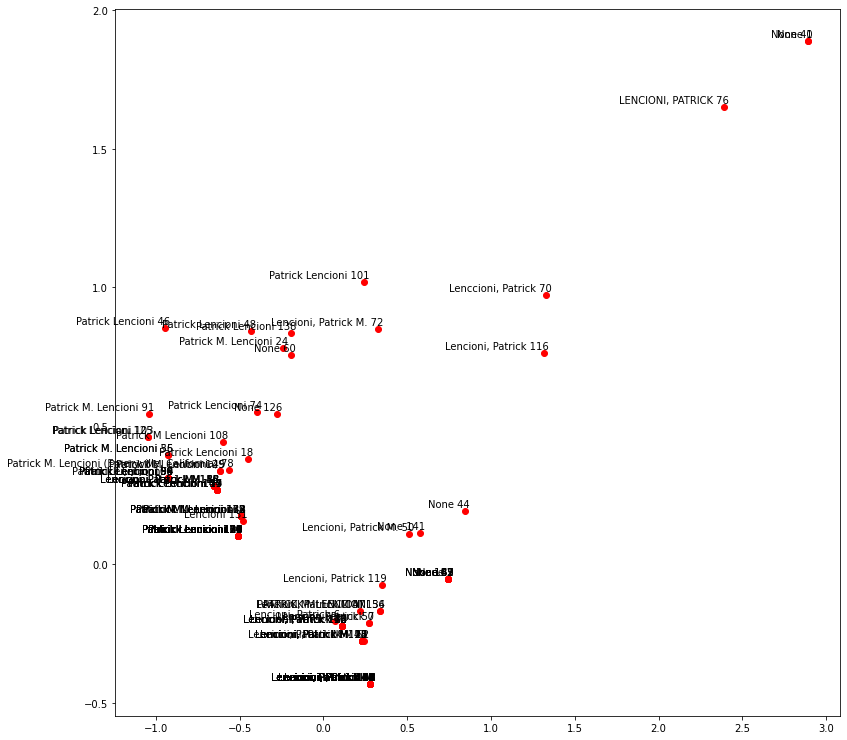

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.004252910614013672
num of classes: 10


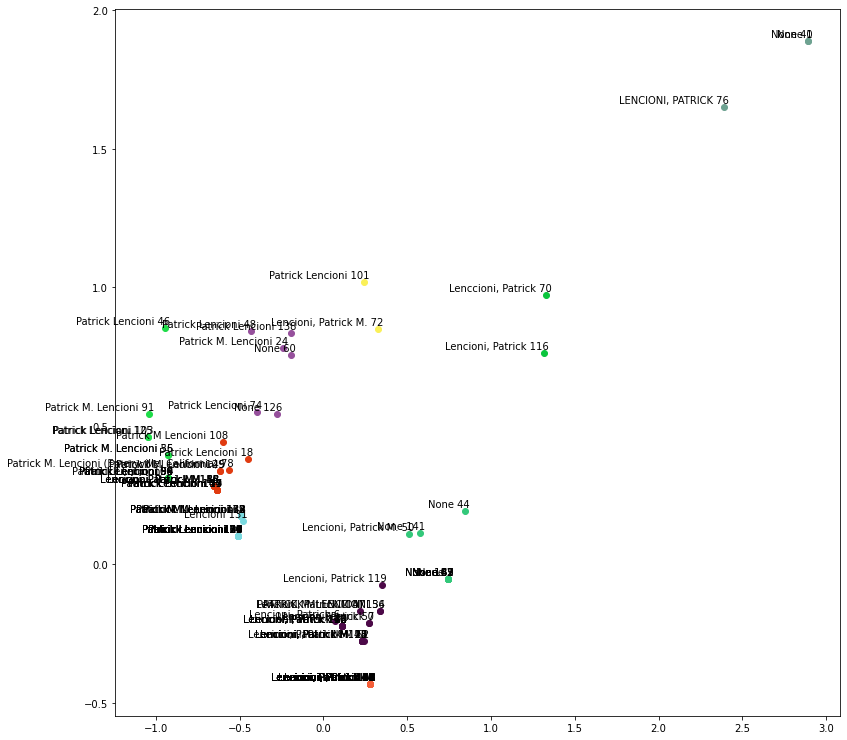

-------------------------------
{'Lencioni, Patrick': 51} VS true_author: Patrick Lencioni
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 5<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0439813786
true author: Brian Selznick
-------------------------------
tot cases of author's name: 11
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.6745407581329346
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.007256746292114258
rows: 148
classes: 148


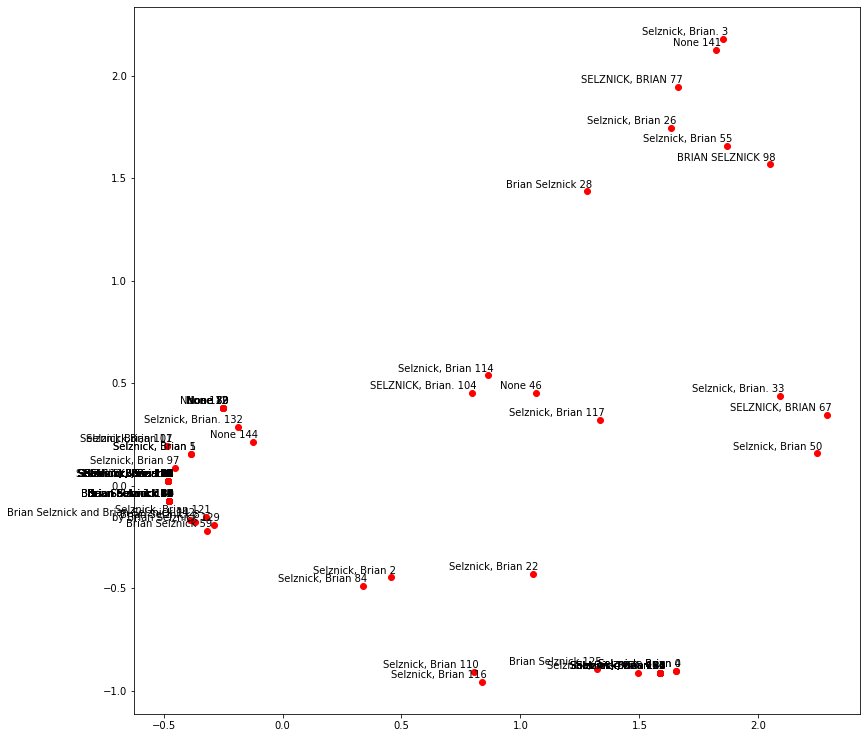

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.001880645751953125
num of classes: 10


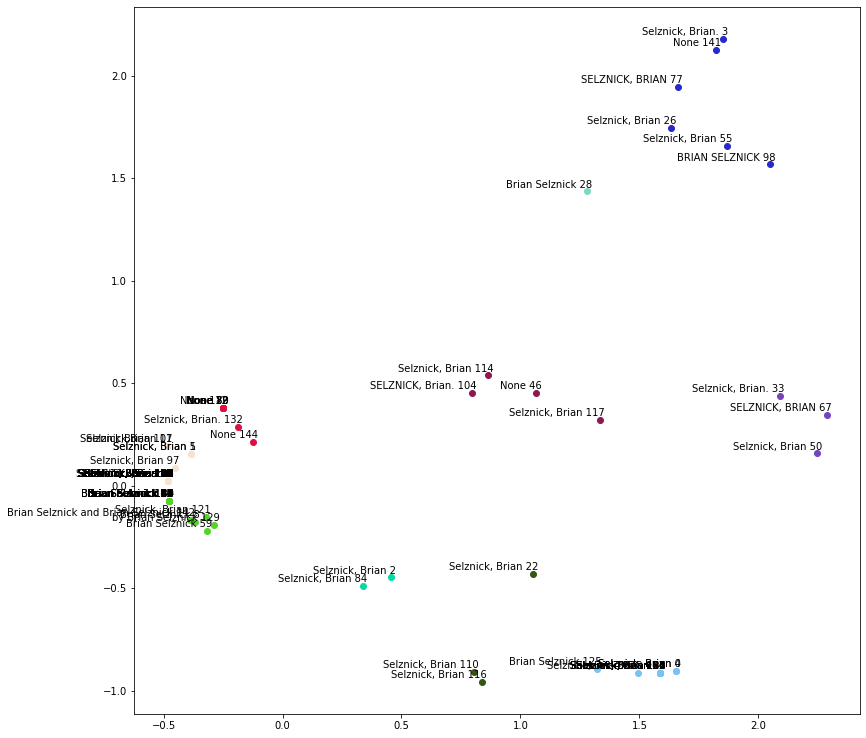

-------------------------------
{'SELZNICK, Brian': 1, 'Selznick, Brian': 78, 'Selznick,Brian': 2} VS true_author: Brian Selznick
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 6<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 067082982X
true author: Stephen King
-------------------------------
tot cases of author's name: 10
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.6516580581665039
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.01994180679321289
rows: 146
classes: 146


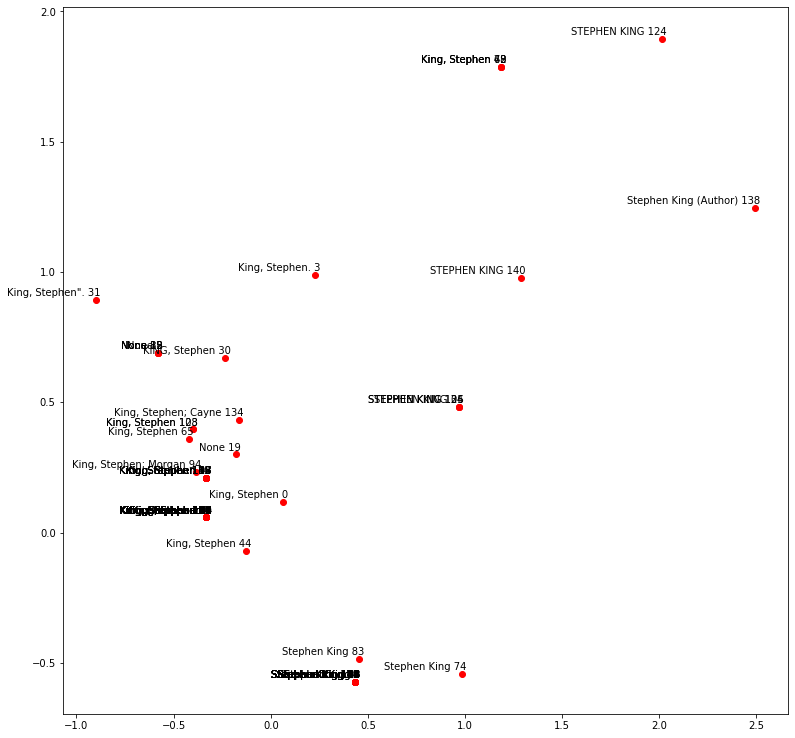

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0020601749420166016
num of classes: 10


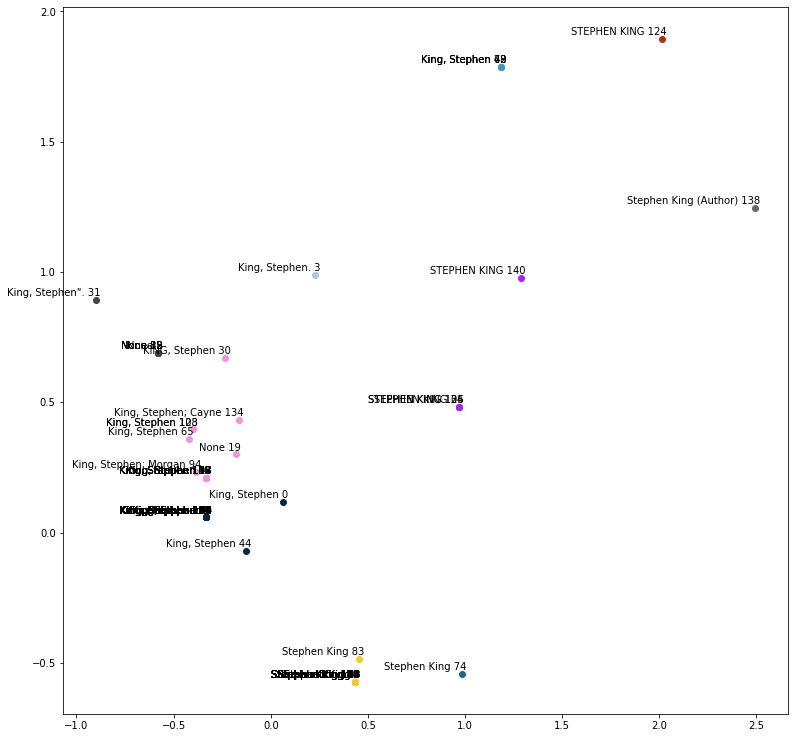

-------------------------------
{'King, Stephen': 71} VS true_author: Stephen King
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 7<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0060530928
true author: Neil Gaiman
-------------------------------
tot cases of author's name: 24
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.47934889793395996
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.007823705673217773
rows: 146
classes: 146


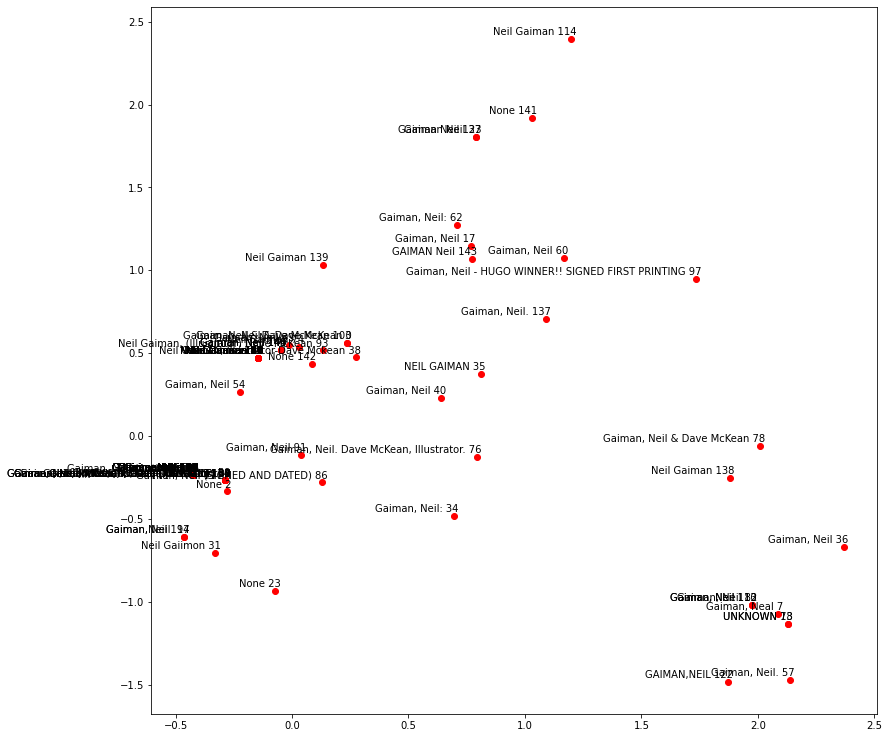

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0054967403411865234
num of classes: 10


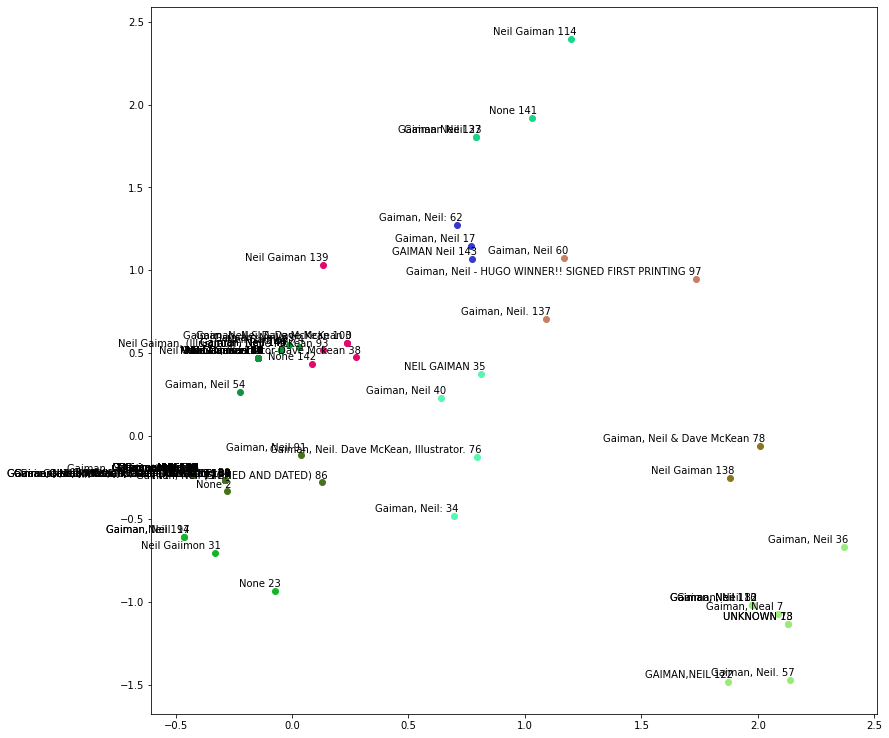

-------------------------------
{'Gaiman, Neil': 67, 'Gaiman, Neil (Author)': 1, 'Gaiman, Neil (SIGNED AND DATED)': 1, 'Gaiman, Neil/ McKean, Dave (ILT)': 3, 'Gaiman, Neil/ McKean, Dave (Illustrator)': 1, 'Gaiman, Neil; McKean, Dave': 1, 'Gaiman, Neil; McKean, Dave [Illustrator]': 5, 'None': 1} VS true_author: Neil Gaiman
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 8<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0439139597
true author: J. K. Rowling
-------------------------------
tot cases of author's name: 25
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.793489933013916
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.007377147674560547
rows: 146
classes: 146


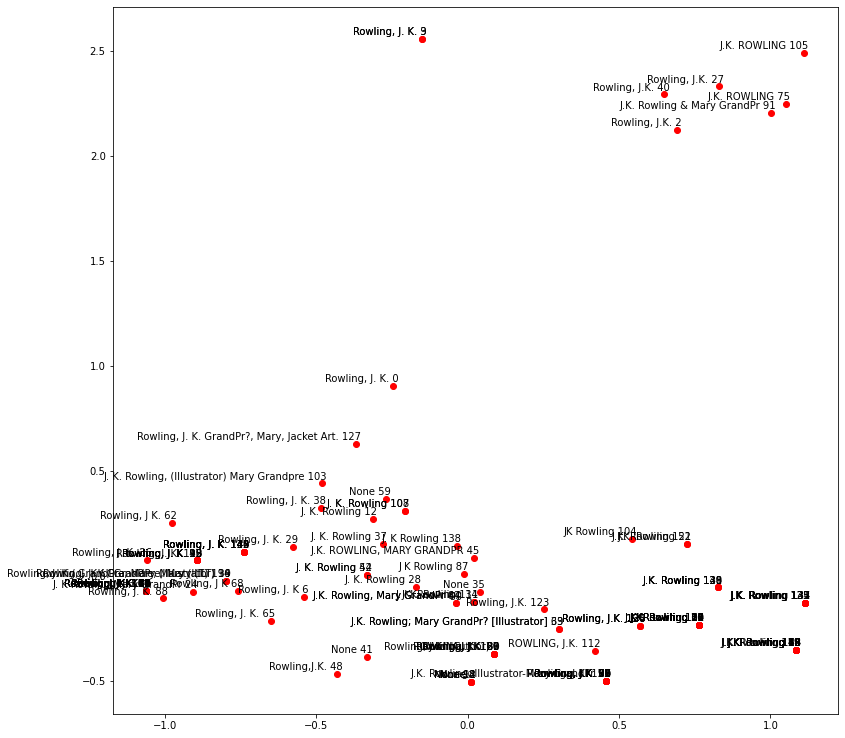

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0021250247955322266
num of classes: 10


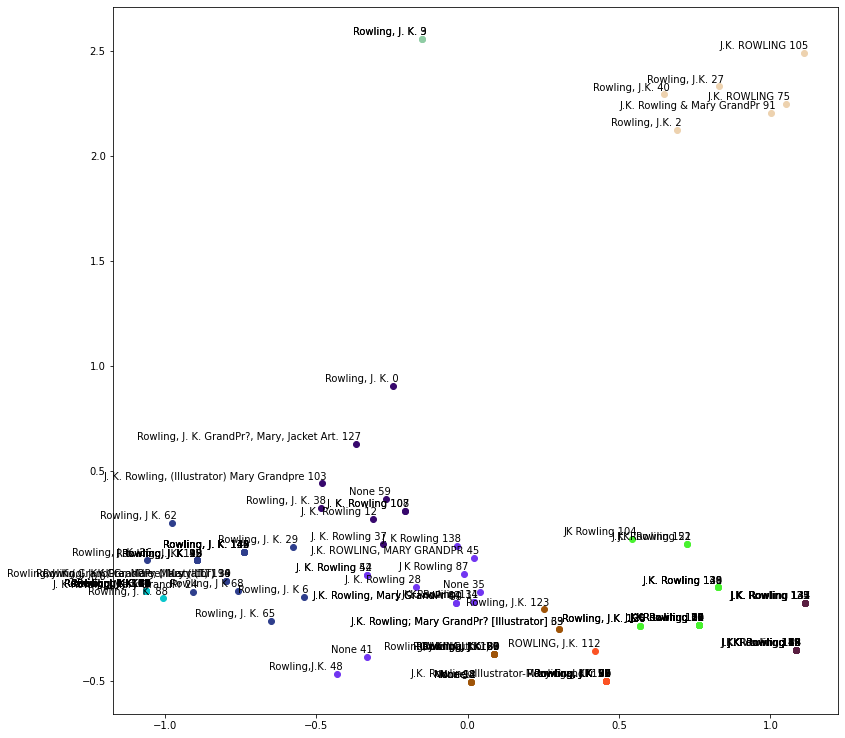

-------------------------------
{'Rowling, J. K.': 25} VS true_author: J. K. Rowling
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 9<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0375502912
true author: Laura Hillenbrand
-------------------------------
tot cases of author's name: 11
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.6207699775695801
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.01152801513671875
rows: 145
classes: 145


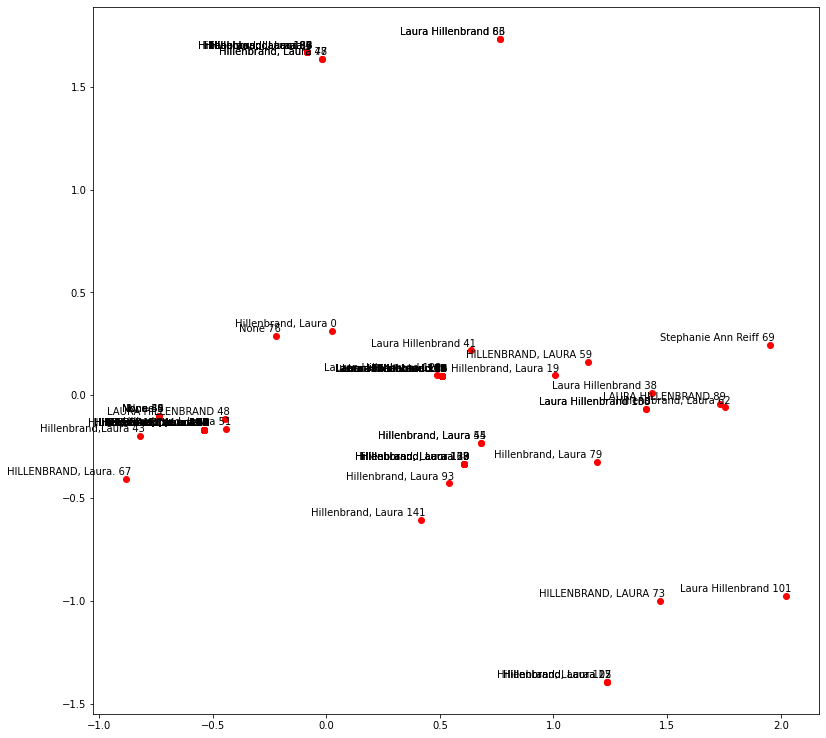

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.006227970123291016
num of classes: 10


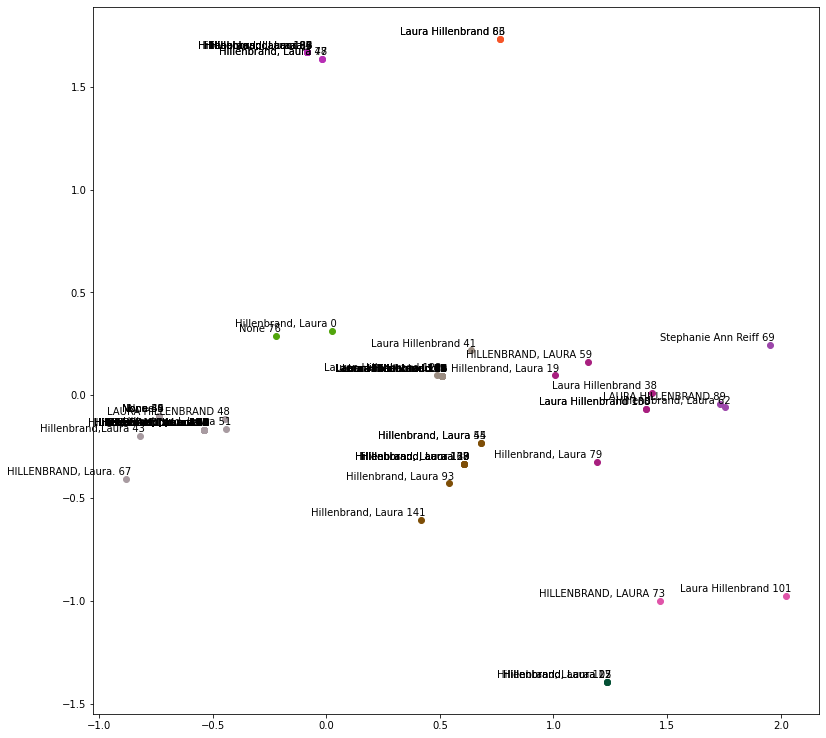

-------------------------------
{'HILLENBRAND, Laura': 2, 'HILLENBRAND, Laura.': 1, 'Hillenbrand, Laura': 68, 'Hillenbrand,Laura': 1, 'LAURA HILLENBRAND': 1, 'None': 4} VS true_author: Laura Hillenbrand
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 10<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 159562015X
true author: Tom Rath
-------------------------------
tot cases of author's name: 10
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.886850118637085
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.009640932083129883
rows: 144
classes: 144


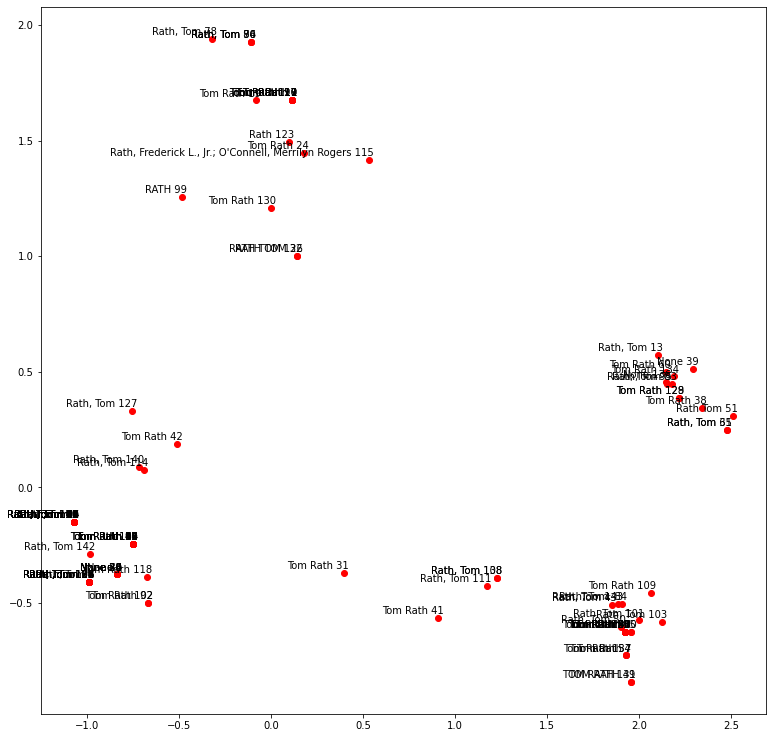

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.002274036407470703
num of classes: 10


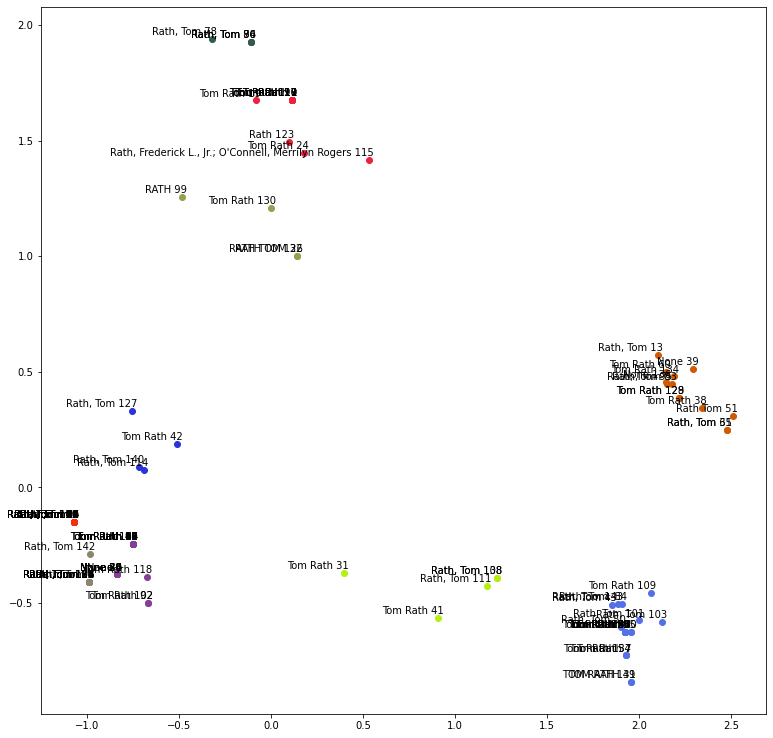

-------------------------------
{'Rath, Tom': 41} VS true_author: Tom Rath
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 11<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0679412956
true author: Anne Rice
-------------------------------
tot cases of author's name: 9
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 1.1361210346221924
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.031504154205322266
rows: 144
classes: 144


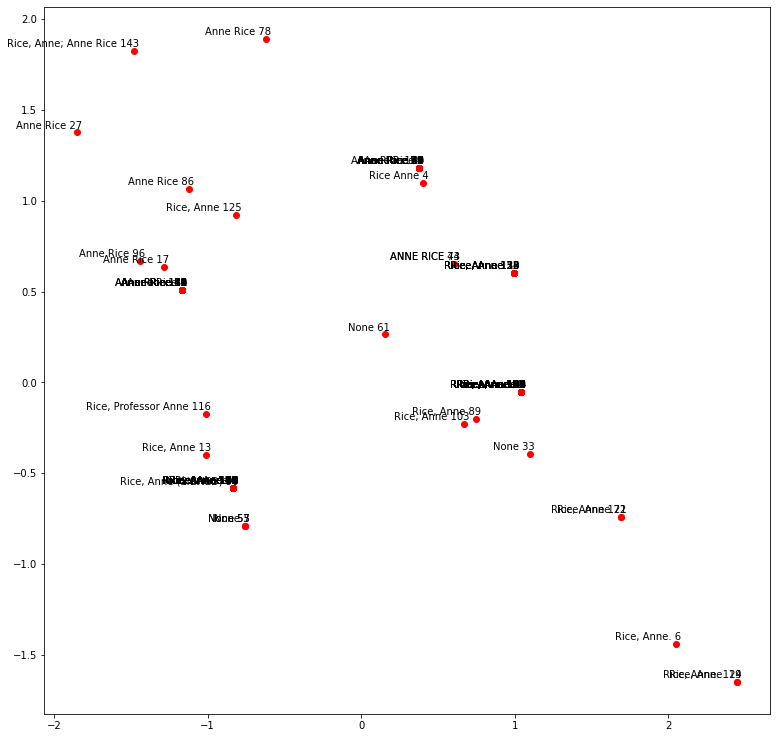

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0018608570098876953
num of classes: 10


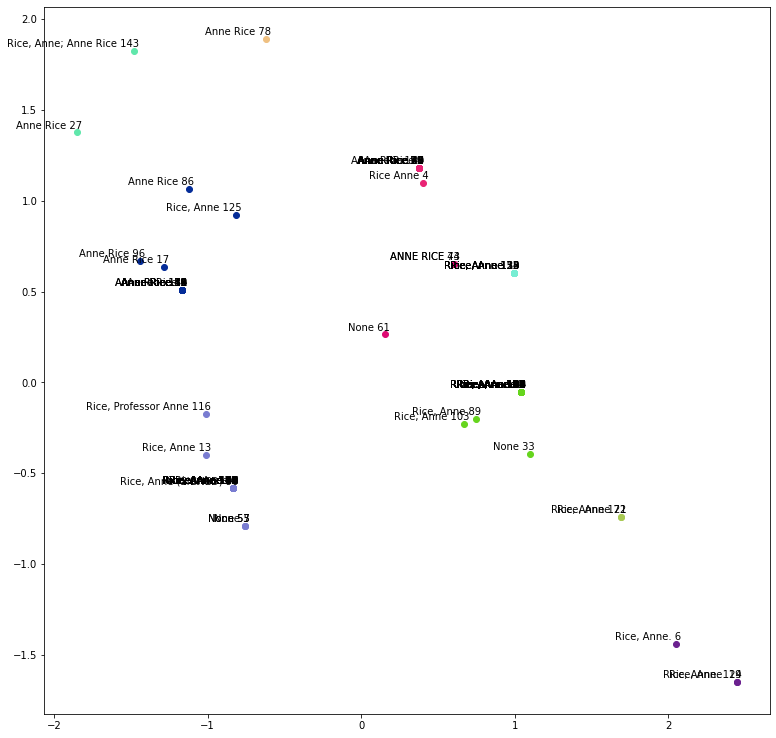

-------------------------------
{'None': 3, 'Rice, Anne': 45, 'Rice, Anne (SIGNED)': 1, 'Rice, Professor Anne': 1} VS true_author: Anne Rice
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 12<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 1880418568
true author: Stephen King
-------------------------------
tot cases of author's name: 24
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.8009898662567139
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.007440805435180664
rows: 144
classes: 144


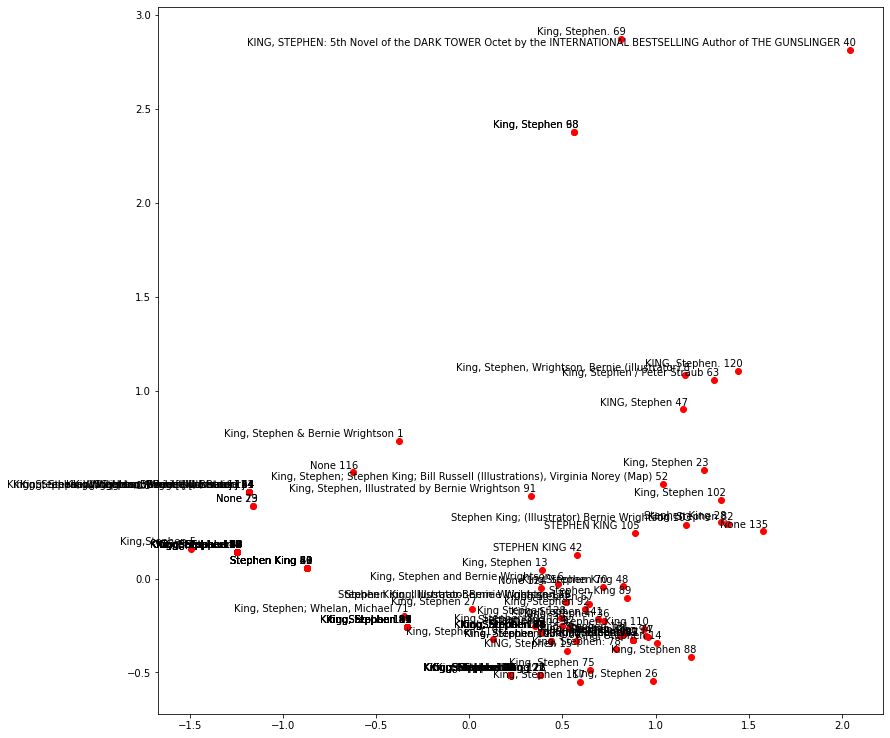

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.002167940139770508
num of classes: 10


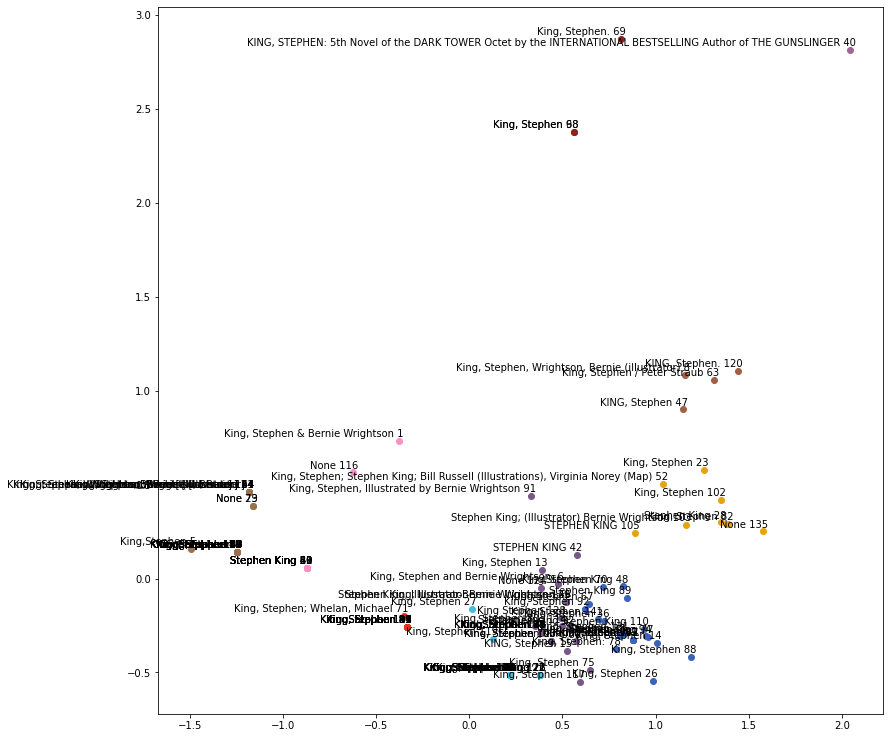

-------------------------------
{'King, Stephen': 26, 'King, Stephen; Wrightson, Bernie': 2, 'King, Stephen; Wrightson, Bernie [Illustrator]': 3, 'King,Stephen': 1, 'None': 2, 'Wrightson, Bernie (Illustrator)': 1} VS true_author: Stephen King
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 13<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0345303059
true author: Arthur C. Clarke
-------------------------------
tot cases of author's name: 18
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.6396548748016357
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.012932777404785156
rows: 143
classes: 143


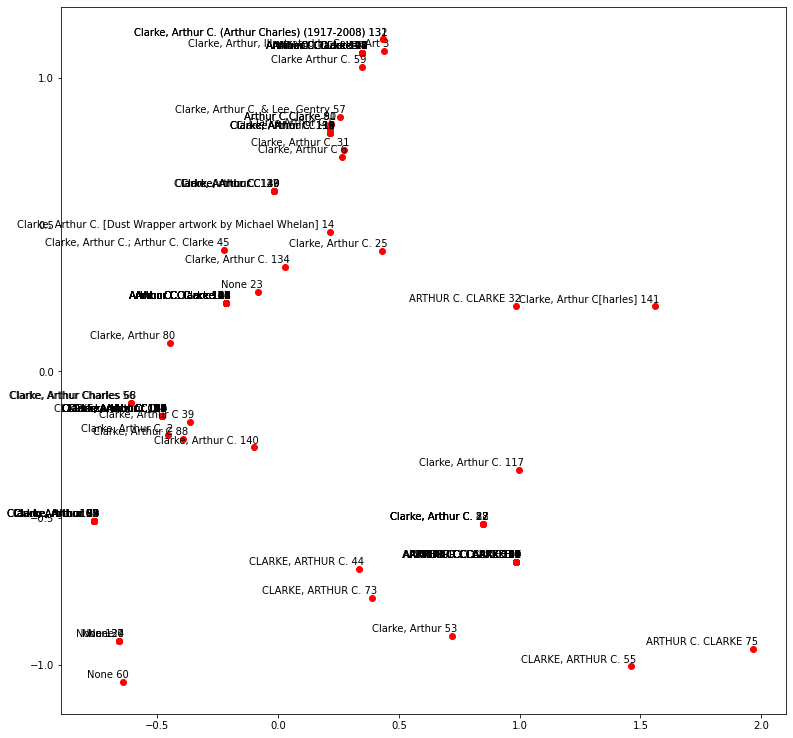

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.002048015594482422
num of classes: 10


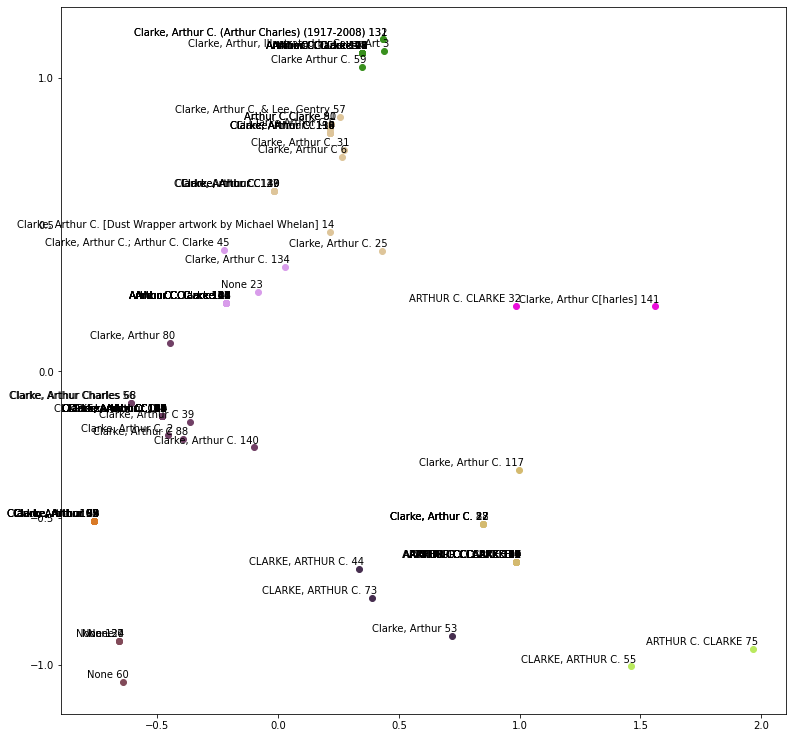

-------------------------------
{'CLARKE, Arthur C.': 1, 'Clarke, Arthur': 1, 'Clarke, Arthur C': 2, 'Clarke, Arthur C.': 39, 'Clarke, Arthur Charles': 2} VS true_author: Arthur C. Clarke
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 14<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0679411674
true author: Toni Morrison
-------------------------------
tot cases of author's name: 13
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.38588690757751465
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.00896596908569336
rows: 143
classes: 143


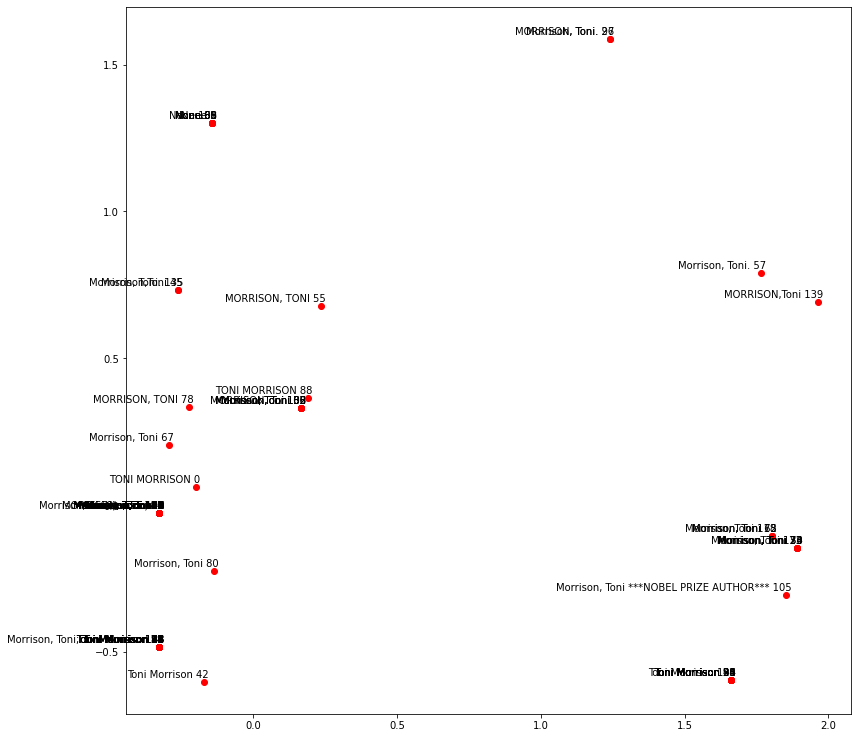

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.001310110092163086
num of classes: 10


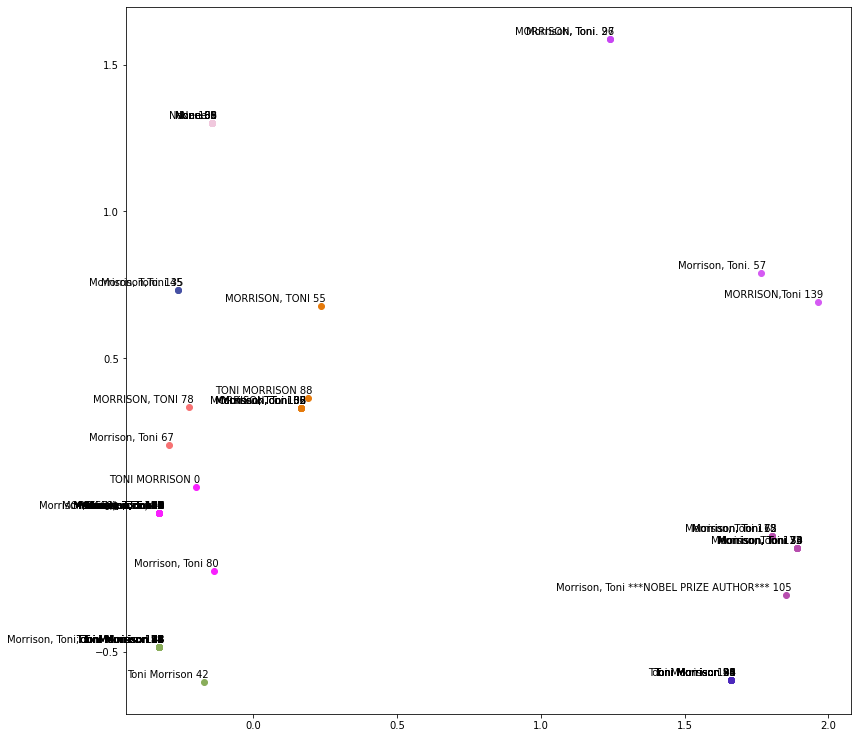

-------------------------------
{'MORRISON, Toni': 1, 'Morrison, Toni': 82, 'Morrison, Toni (editor)': 1, 'TONI MORRISON': 1} VS true_author: Toni Morrison
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 15<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0316065781
true author: Elizabeth Kostova
-------------------------------
tot cases of author's name: 8
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.5284771919250488
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.007419109344482422
rows: 143
classes: 143


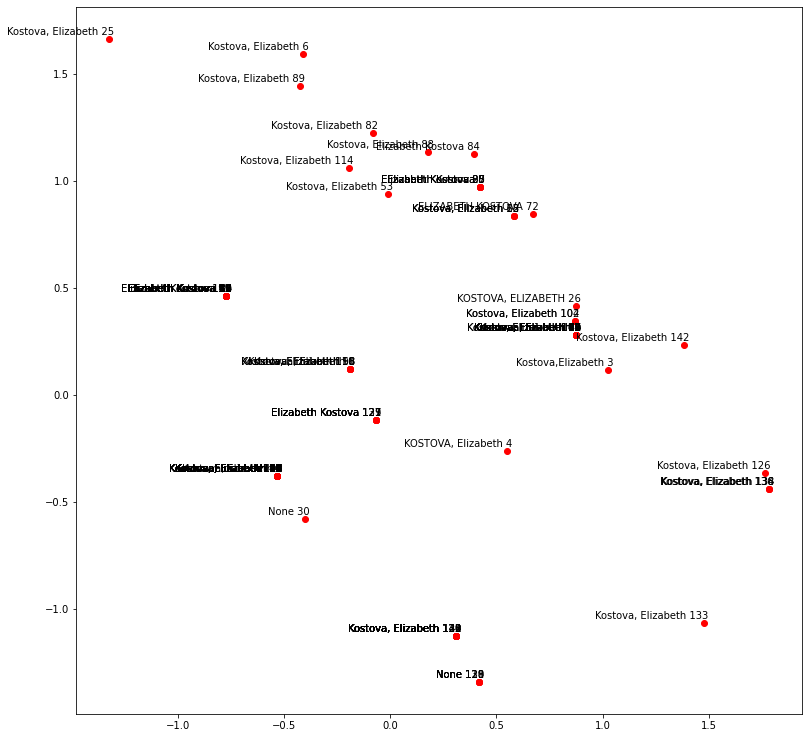

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0019178390502929688
num of classes: 10


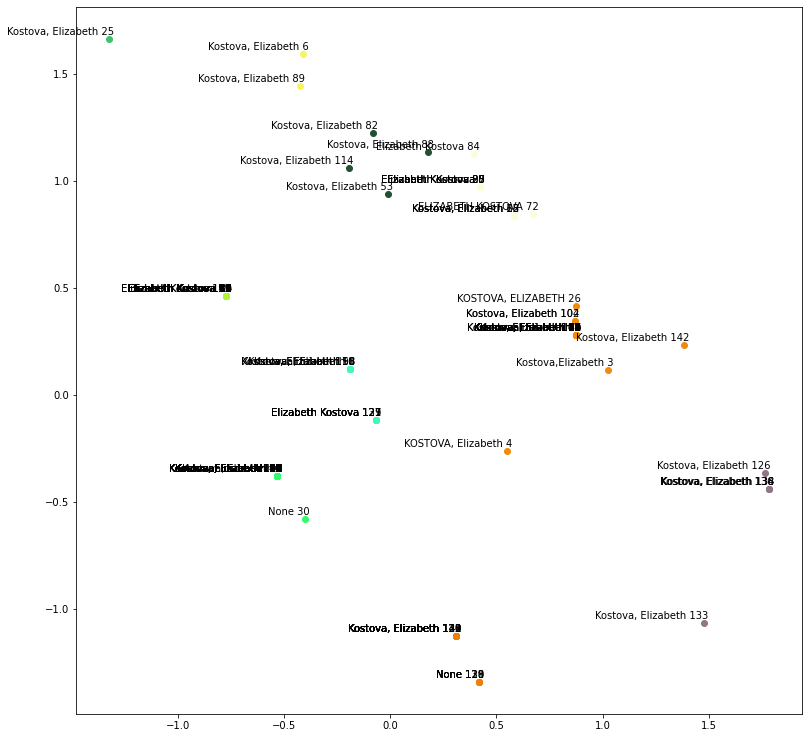

-------------------------------
{'Kostova, Elizabeth': 46, 'None': 1} VS true_author: Elizabeth Kostova
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 16<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0679879242
true author: Philip Pullman
-------------------------------
tot cases of author's name: 15
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.7744090557098389
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.006669044494628906
rows: 143
classes: 143


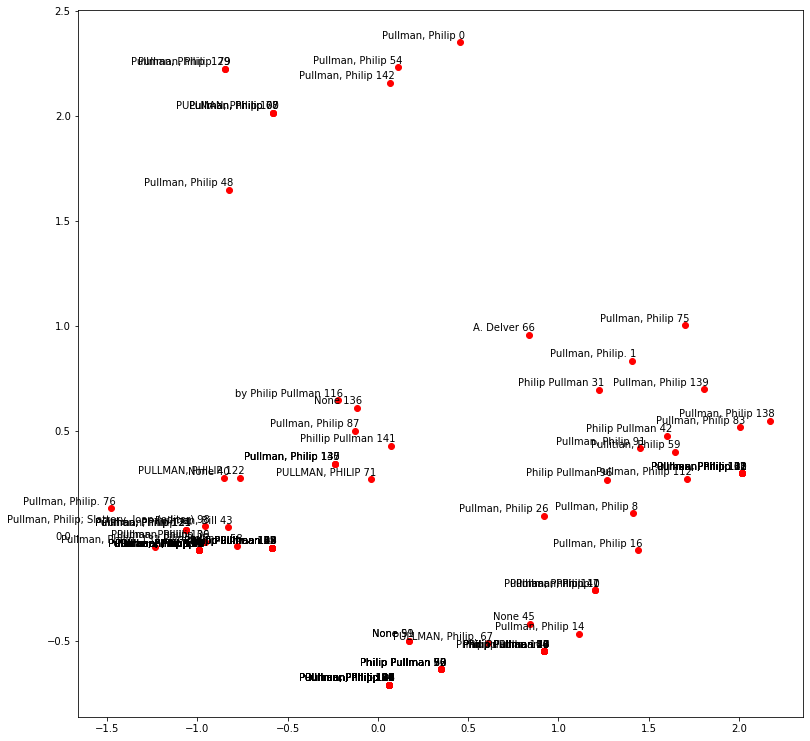

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.004126787185668945
num of classes: 10


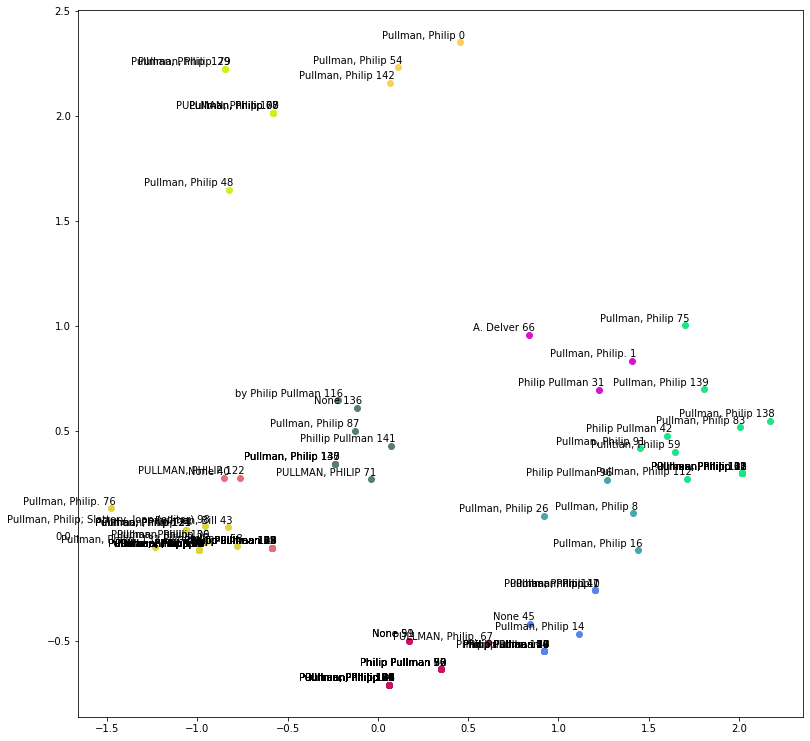

-------------------------------
{'Pilip Pullman': 1, 'Pullman, Bill': 1, 'Pullman, Philip': 35, 'Pullman, Philip.': 2, 'Pullman, Philip; Slattery, Joan (editor)': 1, 'Pullman, Phillip': 2} VS true_author: Philip Pullman
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 17<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0375401601
true author: Anne Rice
-------------------------------
tot cases of author's name: 11
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.6859011650085449
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.019208908081054688
rows: 143
classes: 143


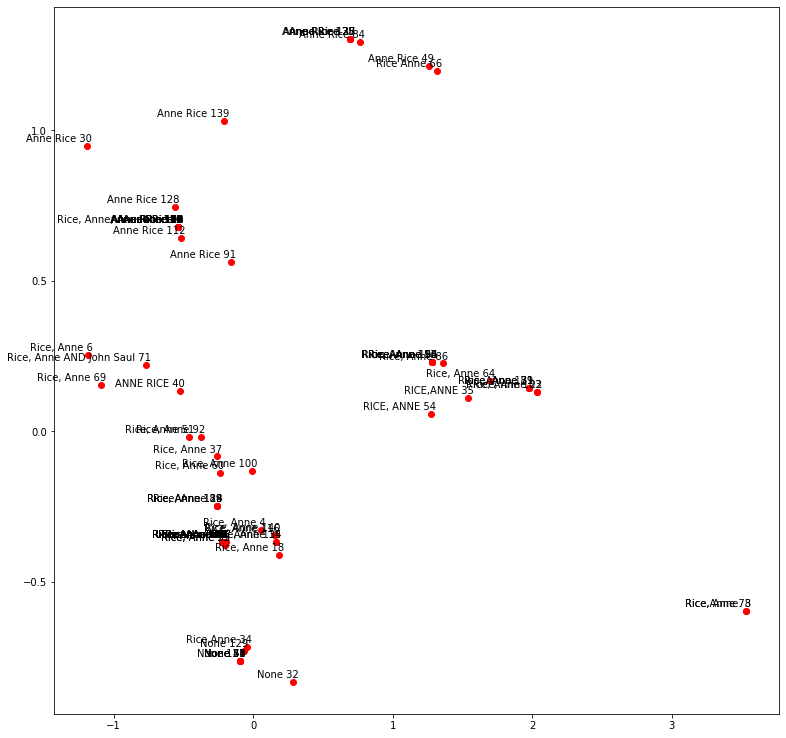

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0011980533599853516
num of classes: 10


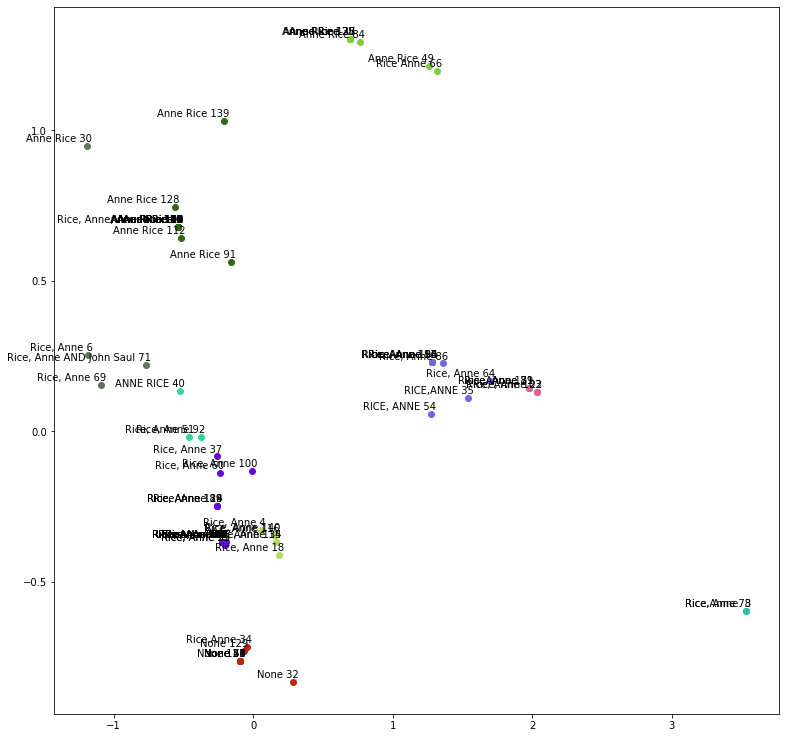

-------------------------------
{'Rice, Anne': 69} VS true_author: Anne Rice
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 18<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0684811073
true author: Stephen Ambrose
-------------------------------
tot cases of author's name: 17
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 1.167435884475708
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.00791025161743164
rows: 143
classes: 143


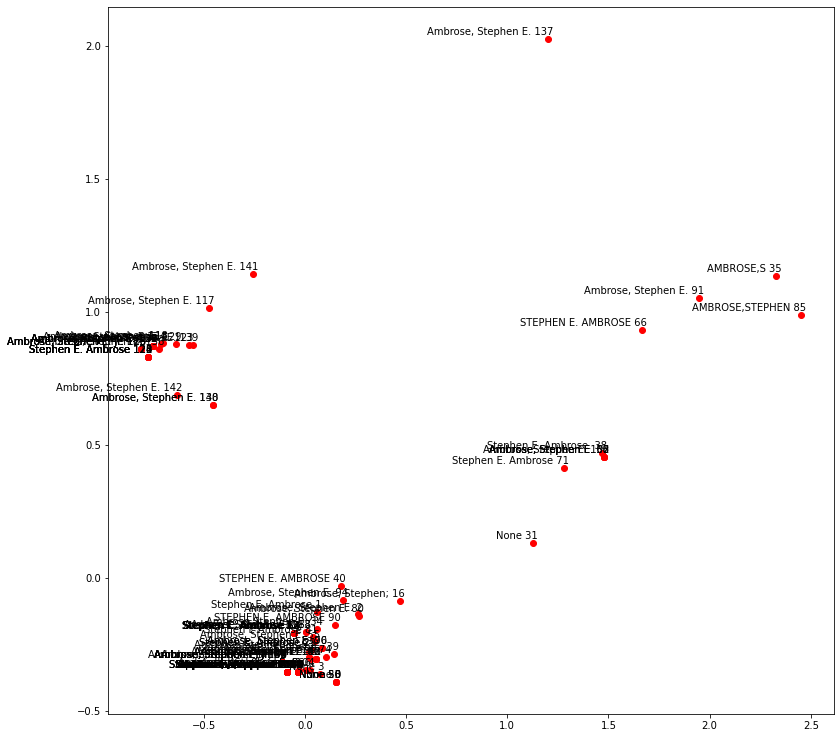

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0023796558380126953
num of classes: 10


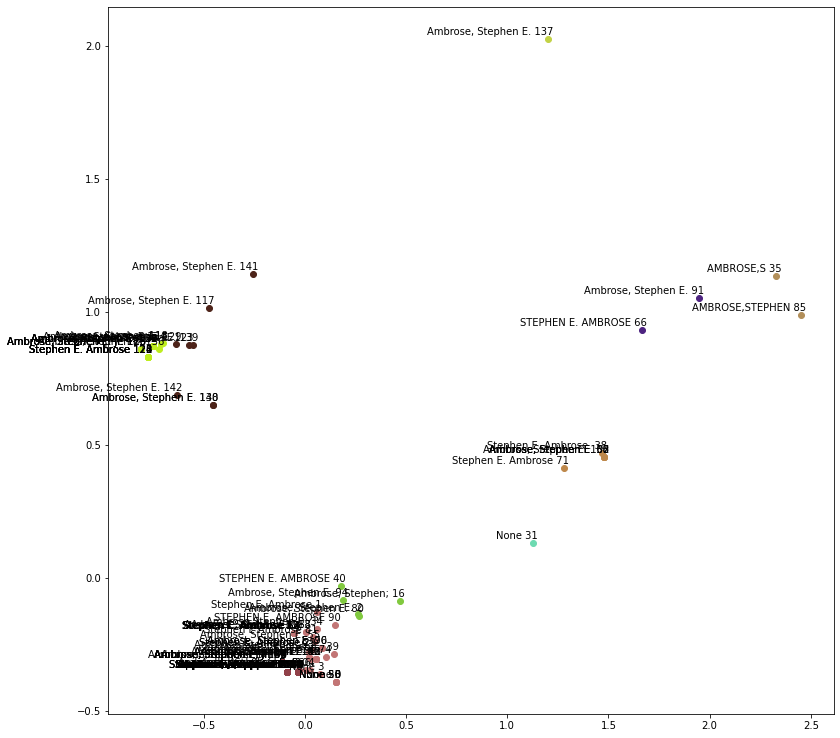

-------------------------------
{'AMBROSE, Stephen E.': 1, 'Ambrose, , Stephen E.': 1, 'Ambrose, Stephen E.': 37, 'Ambrose, Stephen E. Jr.': 9, 'Stephen E. Ambrose': 16} VS true_author: Stephen Ambrose
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 19<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0395486025
true author: William Least Heat-Moon
-------------------------------
tot cases of author's name: 20
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.47364306449890137
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.007315874099731445
rows: 142
classes: 142


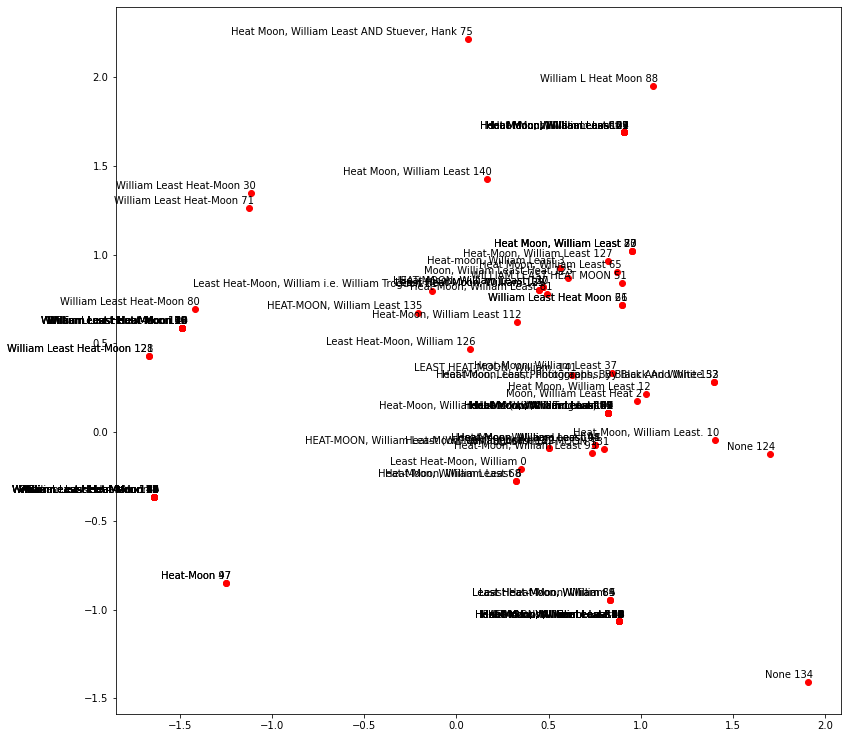

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0018951892852783203
num of classes: 10


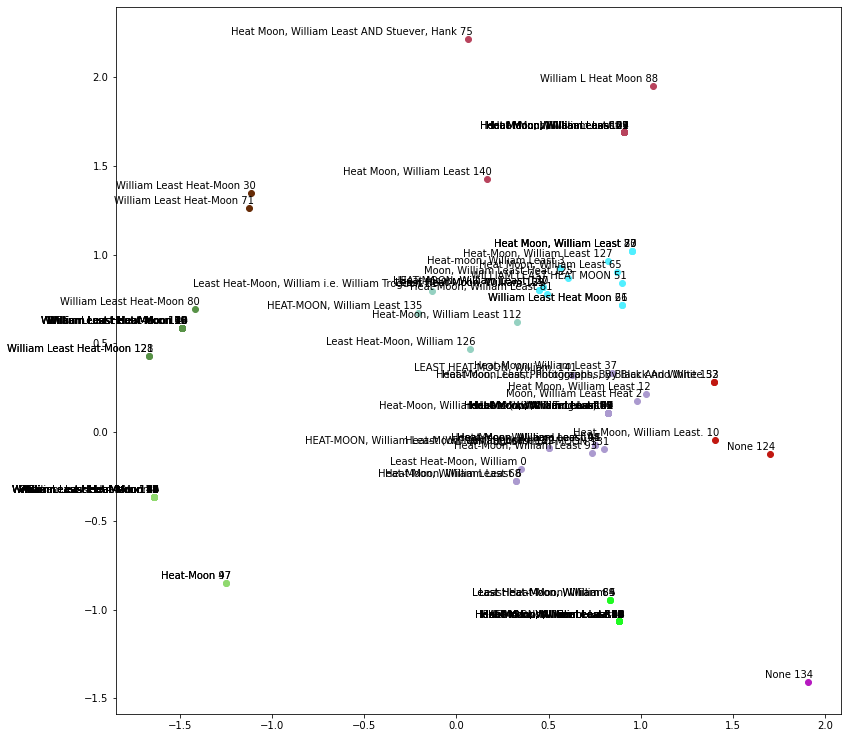

-------------------------------
{'Heat-Moon': 2, 'William Least Heat-Moon': 30} VS true_author: William Least Heat-Moon
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>book number 20<<<<<<<<<<<<<<<<<<<<<<<<
ISBN: 0394498216
true author: Anne Rice
-------------------------------
tot cases of author's name: 12
-------------------------------
embedding_type: inferSent
attributes_list: ['authors', 'title', 'big_cate', 'small_cate']
model_type: bilstm
char_level: False
Embedding time is: 0.795698881149292
-------------------------------
dimension_reduction: pca
num_components: 2
Dimension reduction time is: 0.007779121398925781
rows: 142
classes: 142


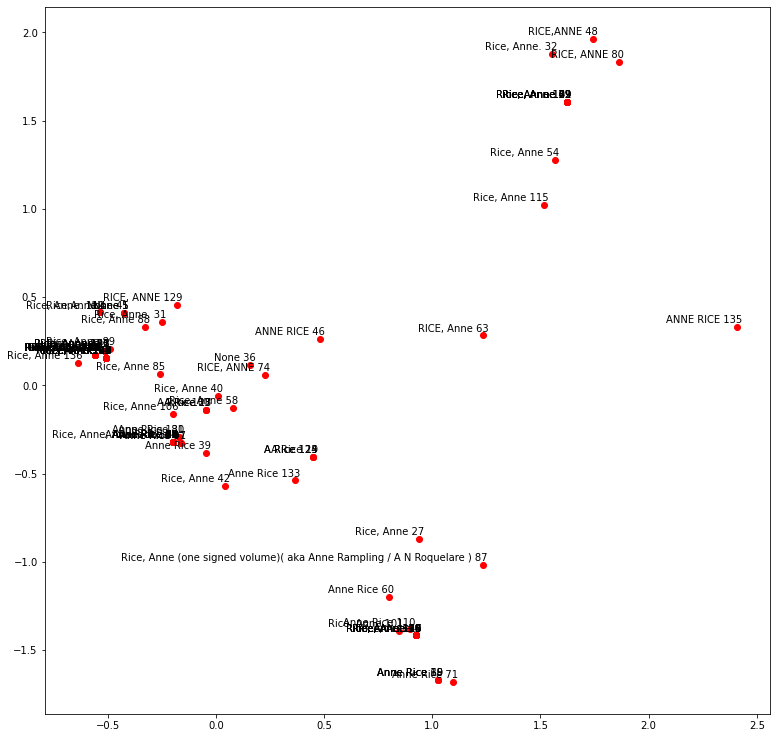

-------------------------------
cluster_method: hierarchy
num_clusters: 10
Blocking time is: 0.0019068717956542969
num of classes: 10


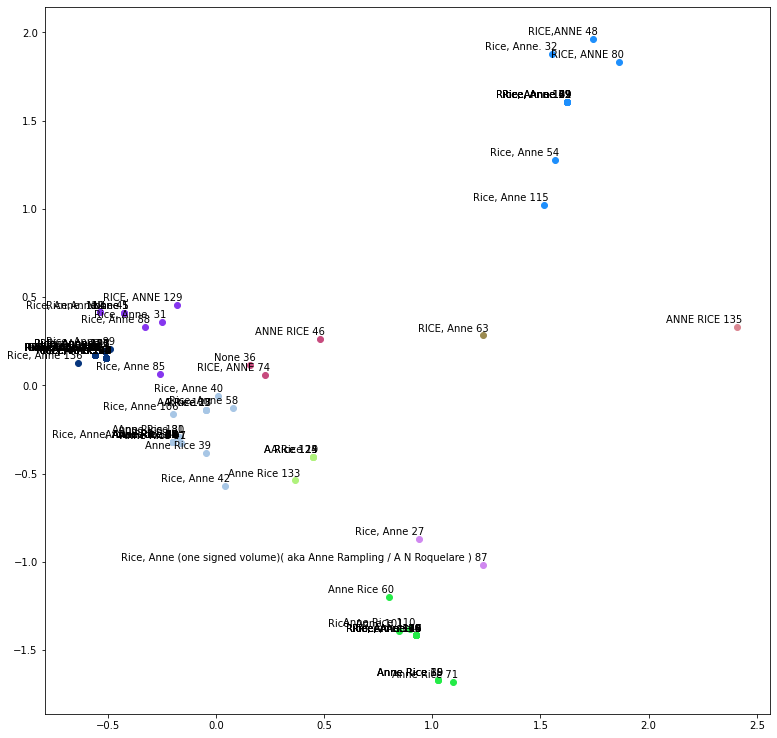

-------------------------------
{'RICE, Anne': 1, 'Rice, Anne': 68} VS true_author: Anne Rice


In [13]:
for index in range(1,20):
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>book number {0}<<<<<<<<<<<<<<<<<<<<<<<<".format(index+1))
    table_ISBN, list_authors, true_author = load_by_index(table_group_by_isbn, isbn_list, true_authors, index)
    print("-------------------------------")
    print("tot cases of author's name: {0}".format(len(table_ISBN['authors'].value_counts())))
    print("-------------------------------")
    embeddings_tokens = sentence_embedding(table_ISBN, key_values)
    print("-------------------------------")
    pca_embeddings = dimension_reduction_algorithms(embeddings_tokens, key_values)
    plotChart(list_authors, pca_embeddings)
    print("-------------------------------")
    blocks = cluster_algorithm(pca_embeddings, key_values)
    plotCluster(blocks, list_authors, key_values['num_clusters'], pca_embeddings)
    print("-------------------------------")
    author_candidate = get_author_candidate(list_authors, blocks)
    print("{0} VS true_author: {1}".format(author_candidate, true_author))

In [14]:
table_ISBN, list_authors, true_author = load_by_index(table_group_by_isbn, isbn_list, true_authors, 2)

ISBN: 0385349947
true author: Sheryl Sandberg


In [15]:
table_ISBN['authors'].value_counts()

Sandberg, Sheryl                         95
Sheryl Sandberg                          30
None                                      7
Sheryl Sandberg, Nell Scovell             3
Sandberg, Sheryl, and Scovell, Nell       1
Sandberg, Sheryl/ Scovell, Nell (CON)     1
Sandburg, Sheryl (SIGNED)                 1
Sandberg, Sheryl; Scovell, Nell           1
Sandberg, Sheryl and Nell Scovell         1
Sandberg, Shery; Grant, Adam              1
Sandberg Sheryl                           1
Sandberg, Sheryl.                         1
SANBERG, SHERYL                           1
Sandberg, Sheryl:                         1
SANDBERG,SHERYL                           1
Sandberg                                  1
SANDBERG, SHERYL                          1
Sasndberg, Sheryl                         1
Name: authors, dtype: int64